### Conducting A/B for testing new plateform design 
The objective of this study is to assist the Olist e-commerce platform, which has decided to redesign its website. My goal as a data analyst is to conduct an A/B test to determine which version of the site should be kept: the new one or the old one.
Attached is the code used to perform this study

In [36]:
import pandas as pd
import numpy as np

### 1 - Importez les 3 fichiers 

In [37]:
customers_ab_test = pd.read_csv ("customers_ab_test.csv")
customers_ab_test 

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,AB_group
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,0
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,0
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,0
...,...,...,...,...,...,...,...
11542,11542,b999716961df05075a380f01c338cd83,af221994a2abf3c9a7223b782b210641,13145,paulinia,SP,0
11543,11543,55fefed6ba1e216d5dc35ea5ea0bbf5f,3b1e1d08efea734493e9d8c1d65743a1,30140,belo horizonte,MG,0
11544,11544,29f0a8c1652a2f41c810820767c688da,33490faf8baed348c792ac23f8184488,1524,sao paulo,SP,0
11545,11545,5ee16d73330e44ab4611eca44fba31e2,8456a03a6bafaedbdf87665a102efccc,27286,volta redonda,RJ,1


In [38]:
customers_ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11547 entries, 0 to 11546
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                11547 non-null  int64 
 1   customer_id               11547 non-null  object
 2   customer_unique_id        11547 non-null  object
 3   customer_zip_code_prefix  11547 non-null  int64 
 4   customer_city             11547 non-null  object
 5   customer_state            11546 non-null  object
 6   AB_group                  11547 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 631.6+ KB


In [39]:
order_payments = pd.read_csv ("order_payments.csv")
order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [40]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [41]:
orders = pd.read_csv ("orders.csv")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### 2 - Réalisez les opérations nécessaires pour obtenir:
* le customer_unique_id (id unique au client)
* la ville 
* l'état
* le groupe AB attribué
* le nombre de commandes du client
* les dépenses totales du client
* un dataset filtré sur les commandes passées entre février et mars 2018 (inclus)

In [43]:
#etape 1 merge all the tables together 
df = pd.merge(orders,order_payments, on = "order_id")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16


In [44]:
df_all = pd.merge(df,customers_ab_test, on = "customer_id")
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,Unnamed: 0,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,AB_group
0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,554,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0
1,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,1,boleto,1,50.13,1708,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG,1
2,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1,credit_card,10,146.45,2040,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,1
3,116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,delivered,2017-12-26 23:41:31,2017-12-26 23:50:22,2017-12-28 18:33:05,2018-01-08 22:36:36,2018-01-29 00:00:00,1,credit_card,4,43.09,8411,6087cfc70fd833cf2db637a5e6e9d76b,88780,imbituba,SC,0
4,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,2,voucher,1,62.15,1205,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,27b6badcdaa36a93808ac126acc05329,dfbad75de7638cec2c9482cac4a10828,delivered,2018-06-27 09:56:34,2018-06-27 11:06:41,2018-06-27 11:42:00,2018-06-28 18:04:13,2018-07-12 00:00:00,1,credit_card,1,35.84,3565,7fbbcdacab871435c9318d8b913b4548,9951,diadema,SP,1
12069,f6f9344efc918f1e00ab84c014aa21d7,166478efeed4f9a861164b4ff5acfe8b,delivered,2017-05-20 11:43:49,2017-05-20 11:55:16,2017-05-25 14:33:53,2017-06-06 16:10:52,2017-06-21 00:00:00,1,credit_card,6,482.69,11386,b0f75567787a7483aadf695f5021e881,21741,rio de janeiro,RJ,0
12070,71c4b7b8844a031b7db8ca41c41d4aae,dce0014426964924f9564758e4fadcbf,delivered,2017-09-03 20:52:34,2017-09-05 04:10:34,2017-09-05 17:47:58,2017-09-14 15:49:47,2017-10-03 00:00:00,1,boleto,1,49.59,2178,6ca7990c03b703e57401911433372d1e,99560,sarandi,RS,0
12071,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,1,boleto,1,48.75,3106,a3983b8b6b679c9f645e6ef9517ac98d,14802,araraquara,SP,1


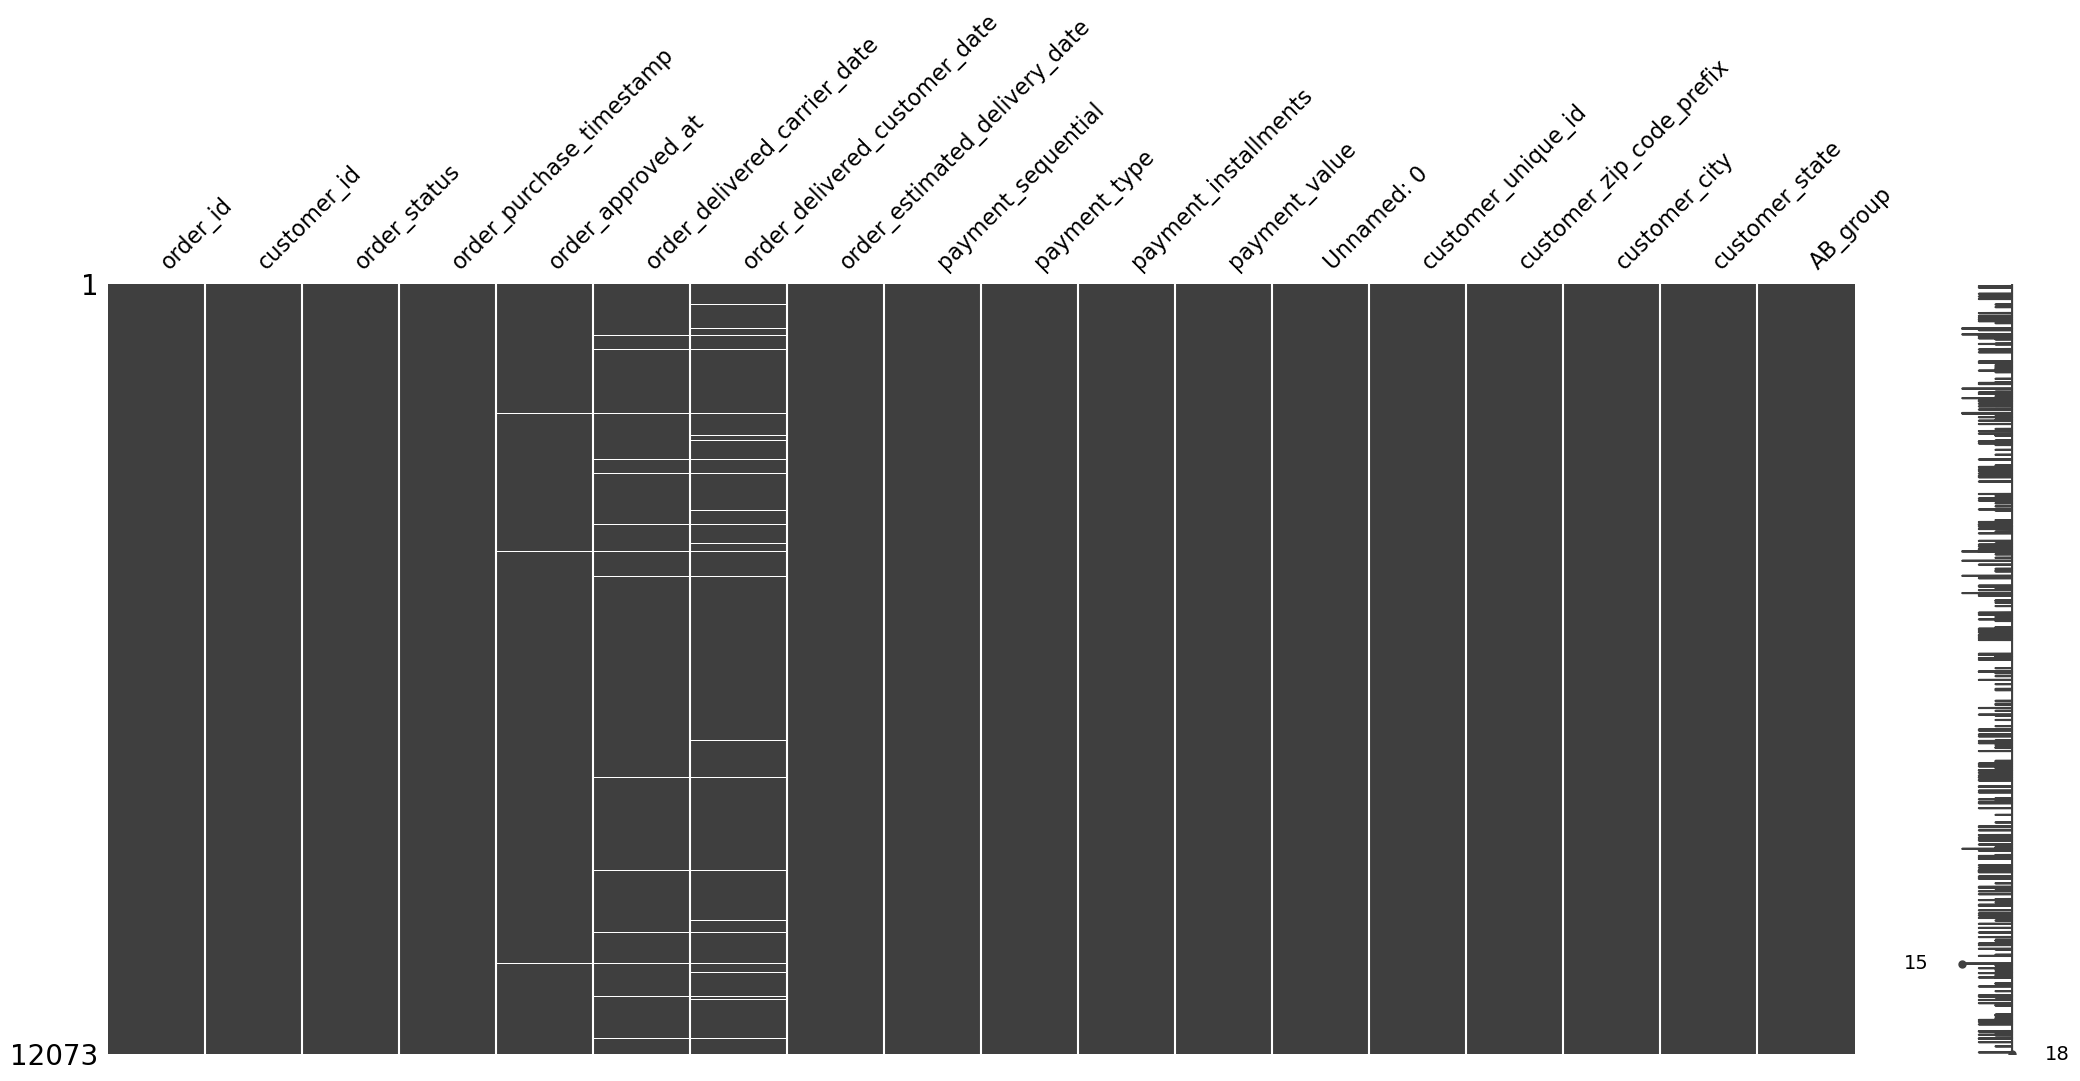

In [45]:
import missingno as msno
msno.matrix(df_all); #pas bcp de valeurs manquantes 

In [46]:
# creer un data frame alleger avec que les colonnes qui m'interessent 
df_all_clean = df_all[["customer_id","customer_unique_id","customer_city","customer_state","AB_group","order_id","order_purchase_timestamp","payment_value"]]
df_all_clean 

,customer_id,customer_unique_id,customer_city,customer_state,AB_group,order_id,order_purchase_timestamp,payment_value
0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,0,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12
1,d3e3b74c766bc6214e0c830b17ee2341,e97109680b052ee858d93a539597bba7,ouro preto,MG,1,82566a660a982b15fb86e904c8d32918,2018-06-07 10:06:19,50.13
2,3b6828a50ffe546942b7a473d70ac0fc,ccafc1c3f270410521c3c6f3b249870f,goiania,GO,1,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,146.45
3,3187789bec990987628d7a9beb4dd6ac,6087cfc70fd833cf2db637a5e6e9d76b,imbituba,SC,0,116f0b09343b49556bbad5f35bee0cdf,2017-12-26 23:41:31,43.09
4,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,feira de santana,BA,0,83018ec114eee8641c97e08f7b4e926f,2017-10-26 15:54:26,62.15
...,...,...,...,...,...,...,...,...
12068,dfbad75de7638cec2c9482cac4a10828,7fbbcdacab871435c9318d8b913b4548,diadema,SP,1,27b6badcdaa36a93808ac126acc05329,2018-06-27 09:56:34,35.84
12069,166478efeed4f9a861164b4ff5acfe8b,b0f75567787a7483aadf695f5021e881,rio de janeiro,RJ,0,f6f9344efc918f1e00ab84c014aa21d7,2017-05-20 11:43:49,482.69
12070,dce0014426964924f9564758e4fadcbf,6ca7990c03b703e57401911433372d1e,sarandi,RS,0,71c4b7b8844a031b7db8ca41c41d4aae,2017-09-03 20:52:34,49.59
12071,ad312389a098ceff46ce92c4595c06d0,a3983b8b6b679c9f645e6ef9517ac98d,araraquara,SP,1,38e9133ce29f6bbe35aed9c3863dce01,2017-10-12 20:54:11,48.75


In [47]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12073 entries, 0 to 12072
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12073 non-null  object 
 1   customer_unique_id        12073 non-null  object 
 2   customer_city             12073 non-null  object 
 3   customer_state            12072 non-null  object 
 4   AB_group                  12073 non-null  int64  
 5   order_id                  12073 non-null  object 
 6   order_purchase_timestamp  12073 non-null  object 
 7   payment_value             12073 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 754.7+ KB


In [48]:
#transformer   order_approved_at en date time 
df_all_clean['order_purchase_timestamp'] = pd.to_datetime(df_all_clean ['order_purchase_timestamp'])

C:\Users\celin\AppData\Local\Temp\ipykernel_3812\1099186629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_clean['order_purchase_timestamp'] = pd.to_datetime(df_all_clean ['order_purchase_timestamp'])


In [49]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12073 entries, 0 to 12072
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               12073 non-null  object        
 1   customer_unique_id        12073 non-null  object        
 2   customer_city             12073 non-null  object        
 3   customer_state            12072 non-null  object        
 4   AB_group                  12073 non-null  int64         
 5   order_id                  12073 non-null  object        
 6   order_purchase_timestamp  12073 non-null  datetime64[ns]
 7   payment_value             12073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 754.7+ KB


In [50]:
#df_all_clean['order_purchase_timestamp'] = df_all_clean['order_purchase_timestamp'].dt.to_period('M')

In [51]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12073 entries, 0 to 12072
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               12073 non-null  object        
 1   customer_unique_id        12073 non-null  object        
 2   customer_city             12073 non-null  object        
 3   customer_state            12072 non-null  object        
 4   AB_group                  12073 non-null  int64         
 5   order_id                  12073 non-null  object        
 6   order_purchase_timestamp  12073 non-null  datetime64[ns]
 7   payment_value             12073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 754.7+ KB


In [52]:
df_all_clean

,customer_id,customer_unique_id,customer_city,customer_state,AB_group,order_id,order_purchase_timestamp,payment_value
0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,0,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12
1,d3e3b74c766bc6214e0c830b17ee2341,e97109680b052ee858d93a539597bba7,ouro preto,MG,1,82566a660a982b15fb86e904c8d32918,2018-06-07 10:06:19,50.13
2,3b6828a50ffe546942b7a473d70ac0fc,ccafc1c3f270410521c3c6f3b249870f,goiania,GO,1,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,146.45
3,3187789bec990987628d7a9beb4dd6ac,6087cfc70fd833cf2db637a5e6e9d76b,imbituba,SC,0,116f0b09343b49556bbad5f35bee0cdf,2017-12-26 23:41:31,43.09
4,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,feira de santana,BA,0,83018ec114eee8641c97e08f7b4e926f,2017-10-26 15:54:26,62.15
...,...,...,...,...,...,...,...,...
12068,dfbad75de7638cec2c9482cac4a10828,7fbbcdacab871435c9318d8b913b4548,diadema,SP,1,27b6badcdaa36a93808ac126acc05329,2018-06-27 09:56:34,35.84
12069,166478efeed4f9a861164b4ff5acfe8b,b0f75567787a7483aadf695f5021e881,rio de janeiro,RJ,0,f6f9344efc918f1e00ab84c014aa21d7,2017-05-20 11:43:49,482.69
12070,dce0014426964924f9564758e4fadcbf,6ca7990c03b703e57401911433372d1e,sarandi,RS,0,71c4b7b8844a031b7db8ca41c41d4aae,2017-09-03 20:52:34,49.59
12071,ad312389a098ceff46ce92c4595c06d0,a3983b8b6b679c9f645e6ef9517ac98d,araraquara,SP,1,38e9133ce29f6bbe35aed9c3863dce01,2017-10-12 20:54:11,48.75


In [53]:
df_all_clean.isna().sum()

customer_id                 0
customer_unique_id          0
customer_city               0
customer_state              1
AB_group                    0
order_id                    0
order_purchase_timestamp    0
payment_value               0
dtype: int64

In [54]:
#etape 3 faire le group by client id et compter le nbre de commandes par client 
#methode 1 
#df_all_clean.groupby("customer_unique_id")['order_id'].count()
#faire un graphe qui montre la distribution !!!!
#ici le group by ressort un tableau à part 
#methode 2 faire un sort value et un value counts 

In [55]:
#somme des depenses par client 
#df_all_clean.groupby("customer_unique_id")['payment_value'].sum()
#faire un graphe 

In [56]:
#un dataset filtré sur les commandes passées entre février et mars 2018 (inclus)

In [57]:
df_filtre_date = df_all_clean[(df_all_clean['order_purchase_timestamp'] >= '2018-02-01') & (df_all_clean['order_purchase_timestamp'] <= '2018-03-31' )  ]
df_filtre_date

,customer_id,customer_unique_id,customer_city,customer_state,AB_group,order_id,order_purchase_timestamp,payment_value
8,4fa1cd166fa598be6de80fa84eaade43,68954feaafe4dd638f3bd3e2afa174ec,sao paulo,SP,0,f848643eec1d69395095eb3840d2051e,2018-03-15 08:52:40,88.90
15,c39bde0d4030d5e31e654f0c20db9786,8e4404700874036dbb2c606039875e1a,sao jose dos campos,SP,1,66d03fb3c4b0f80b5db04ef9c260336d,2018-02-06 21:09:10,96.01
23,0489975a325480c9e385e9f135bb13c3,b577af9a54b023b4bcc51f69bb937f1c,franca,SP,1,1d067305b599c1e0dceb3864056ea527,2018-02-14 13:05:17,170.43
25,330ca6b207006779da875ef48faef608,c3fcf3b664801fe10c4d9f62ac72b21a,sao paulo,SP,1,93ec3e2c9a4beee38c28973d307093e1,2018-03-29 14:27:41,204.45
26,eb1c0e1ca3e17eccaefb7f0d4dc659b1,48625b68a29dcfc3aba4b5147e0625aa,rio de janeiro,RJ,0,9ceb8ab5165cefecdddb546cb5a6362b,2018-02-05 17:27:54,138.09
...,...,...,...,...,...,...,...,...
12030,4673e1ebd04cf92efca5b5068c6b4b2d,cc3fa56799bf052b6f877995f7cc592e,ferraz de vasconcelos,SP,0,e55253f870ba00d40f6f01475ceecd3c,2018-03-15 23:52:07,124.66
12033,3043e244f2c35c95554a613c30a7a332,b7a117351f7b0f426a78d5781f2dc328,barreiras,BA,1,4f2a29346d25613d2e553a8d6381b006,2018-03-15 23:18:16,987.20
12039,cb20df3c23dabff46478995c1701f441,14dbedc7240fbbb72a8aaf4d8fff9629,brasilia,DF,1,2ff0c35261b0f6905e8dbd2c664c86af,2018-02-27 08:19:54,65.09
12058,82495ff60ac5ed00f1a86fabf329db45,27f4e79732493ed76d9595f9380aee2e,toledo,PR,0,4d515dca9e06667e6ab68acc478df5d6,2018-03-02 17:23:15,105.96


In [58]:

# Agréger par customer_unique_id pour obtenir les informations requises

aggregated_df = df_filtre_date.groupby('customer_unique_id').agg({'customer_city': 'first',
    'customer_state': 'first', 'AB_group': 'first', 'order_id': 'nunique',  
    'payment_value': 'sum'}).reset_index()

 
# Renommer les colonnes pour la clarté
aggregated_df.columns = ['customer_unique_id', 'ville', 'état', 'groupe_AB', 'nombre_de_commandes', 'dépenses_totales']


# Afficher le DataFrame final
display(aggregated_df)

,customer_unique_id,ville,état,groupe_AB,nombre_de_commandes,dépenses_totales
0,0019da6aa6bcb27cc32f1249bd12da05,limeira,SP,0,1,87.71
1,004256f082951ec189a4962b6788c214,sao paulo,SP,0,1,259.15
2,0055bbb9c95f6acb8db89d1f6c316407,criciuma,SC,1,1,83.23
3,00605a8897ed9ad73b5c93bebad2541a,campos dos goytacazes,RJ,0,1,31.13
4,0062adafa3846d9f372d8f1bde591b24,sao paulo,SP,0,1,149.87
...,...,...,...,...,...,...
1611,ff27e114922de117301ebe32dcec9ade,artur nogueira,SP,1,1,35.93
1612,ff3e14860e32acc535aea6a5402d531c,belem,PA,0,1,98.79
1613,ff57f8187098025972fce7e36704ab98,sao paulo,SP,1,1,37.77
1614,ff7e7d4a4669fc03606a21eedad169e3,sao paulo,SP,0,1,30.38


In [59]:
aggregated_df.value_counts()

customer_unique_id                ville                état  groupe_AB  nombre_de_commandes  dépenses_totales
0019da6aa6bcb27cc32f1249bd12da05  limeira              SP    0          1                    87.71               1
a8b73585f061814653136e5a19d79b03  contagem             MG    0          1                    67.50               1
aa89a987e1e092c318fbdc4b0e3dcc44  santo andre          SP    1          1                    61.88               1
a9f55f47cee4f2e61a82d6e751122146  guarulhos            SP    1          1                    92.11               1
a9cb618eeb277ea66ffb0681cca2a504  porto alegre         RS    0          1                    162.41              1
                                                                                                                ..
56feb7485ace57f1566e0eadd2ab282f  pedro leopoldo       MG    1          1                    115.45              1
56ec666ecc3d3b4f23385008b00be5f6  santo andre          SP    1          1            

### 3 - Comparez les groupes 0 et 1 du test AB et visualisez la répartition de leurs caractéristiques 

In [60]:
aggregated_df

,customer_unique_id,ville,état,groupe_AB,nombre_de_commandes,dépenses_totales
0,0019da6aa6bcb27cc32f1249bd12da05,limeira,SP,0,1,87.71
1,004256f082951ec189a4962b6788c214,sao paulo,SP,0,1,259.15
2,0055bbb9c95f6acb8db89d1f6c316407,criciuma,SC,1,1,83.23
3,00605a8897ed9ad73b5c93bebad2541a,campos dos goytacazes,RJ,0,1,31.13
4,0062adafa3846d9f372d8f1bde591b24,sao paulo,SP,0,1,149.87
...,...,...,...,...,...,...
1611,ff27e114922de117301ebe32dcec9ade,artur nogueira,SP,1,1,35.93
1612,ff3e14860e32acc535aea6a5402d531c,belem,PA,0,1,98.79
1613,ff57f8187098025972fce7e36704ab98,sao paulo,SP,1,1,37.77
1614,ff7e7d4a4669fc03606a21eedad169e3,sao paulo,SP,0,1,30.38


In [61]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_unique_id   1616 non-null   object 
 1   ville                1616 non-null   object 
 2   état                 1616 non-null   object 
 3   groupe_AB            1616 non-null   int64  
 4   nombre_de_commandes  1616 non-null   int64  
 5   dépenses_totales     1616 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 75.9+ KB


In [62]:
#group by les AB group 1 et 0 pour avoir leur caracteristiques
x = aggregated_df.groupby("groupe_AB")['dépenses_totales'].mean().reset_index()
x.columns = ['AB_group', 'mean_payment_value']
x

,AB_group,mean_payment_value
0,0,155.930685
1,1,157.750325


In [63]:
import matplotlib.pyplot as plt 
import seaborn as sns 


Text(30.71936728395061, 0.5, 'Panier Moyen')

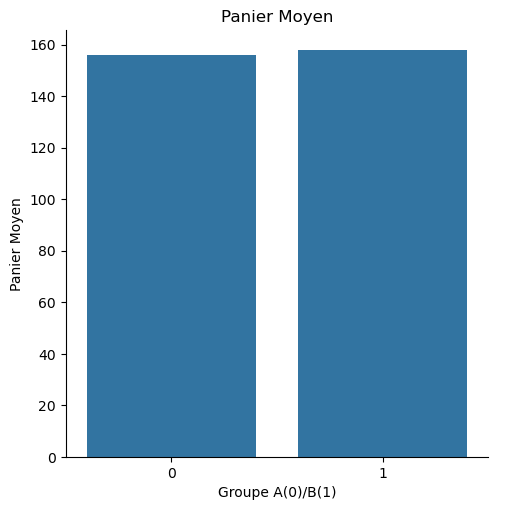

In [65]:
sns.catplot(data=x, x="AB_group", y="mean_payment_value", kind='bar')
plt.title("Panier Moyen")
plt.xlabel('Groupe A(0)/B(1)')
plt.ylabel("Panier Moyen")

In [30]:
w = aggregated_df.groupby("groupe_AB")['nombre_de_commandes'].sum().reset_index()
w.columns = ['AB_group', 'nbr_orders']
w

,AB_group,nbr_orders
0,0,820
1,1,799


Text(30.71936728395061, 0.5, 'Nombre de commandes')

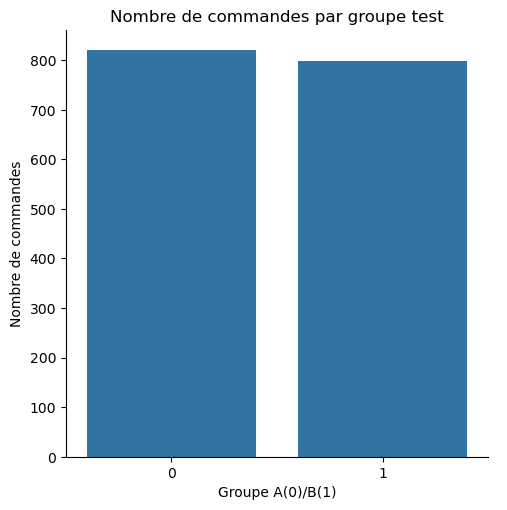

In [31]:
sns.catplot(data=w, x="AB_group", y="nbr_orders", kind='bar')
plt.title("Nombre de commandes par groupe test")
plt.xlabel('Groupe A(0)/B(1)')
plt.ylabel("Nombre de commandes")

In [32]:
#reprsentert la repartitions des états dans chaqyue groupe 1 et 2 
#{etape 1 : groupe by etat et 0 et 1 }
#ensuite faire un count 
#puis faire une representation graphique 


In [33]:
y = aggregated_df.groupby(["état","groupe_AB"])['nombre_de_commandes'].sum().reset_index()
y.columns = ["customer_state",'AB_group', 'nbr_order']
y

,customer_state,AB_group,nbr_order
0,AC,1,1
1,AL,0,3
2,AL,1,5
3,AM,0,1
4,AM,1,1
5,AP,0,1
6,BA,0,16
7,BA,1,22
8,CE,0,10
9,CE,1,9


Text(34.66326285204474, 0.5, 'nombre de commandes')

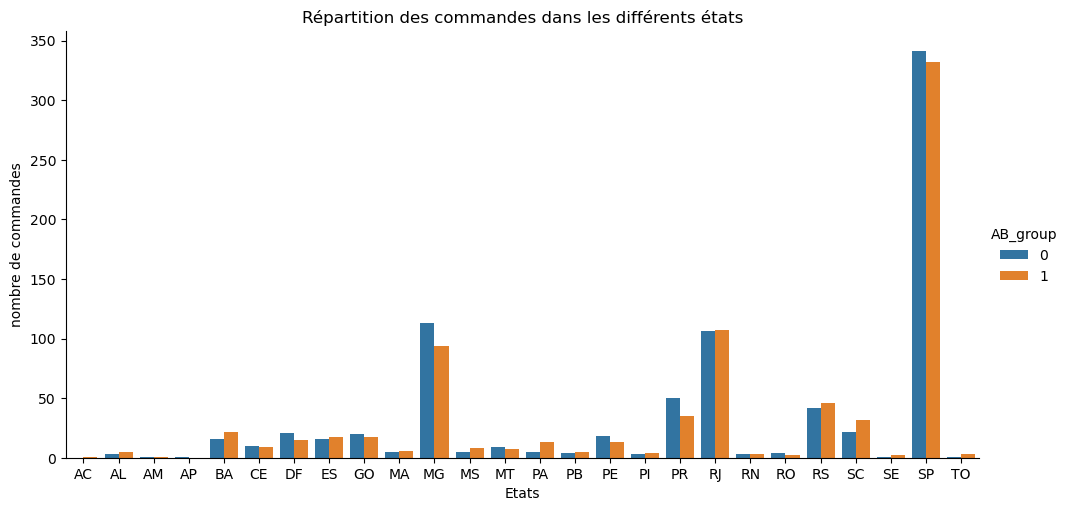

In [35]:
sns.catplot(data=y, x="customer_state", y="nbr_order", aspect=2, kind='bar', hue = "AB_group")
plt.title("Répartition des commandes dans les différents états")
plt.xlabel('Etats')
plt.ylabel("nombre de commandes")

In [392]:
z = aggregated_df.groupby(["état","groupe_AB"])['dépenses_totales'].mean().reset_index()
z.columns = ["customer_state",'AB_group', 'mean_payment_value']
#z

Text(34.66326285204474, 0.5, 'prix moyen des commandes')

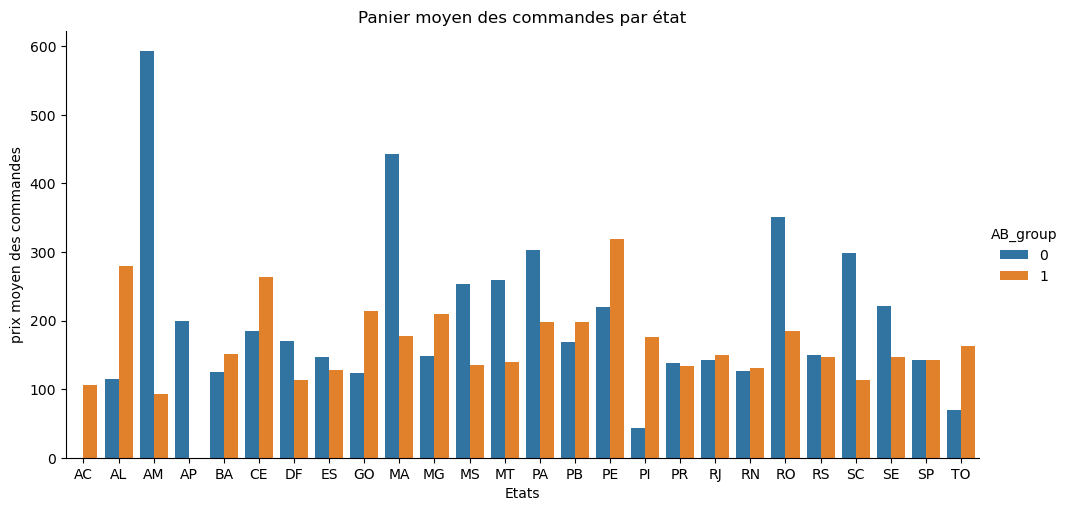

In [393]:
sns.catplot(data=z, x="customer_state", y="mean_payment_value", aspect=2, kind='bar', hue = "AB_group")
plt.title("Panier moyen des commandes par état")
plt.xlabel('Etats')
plt.ylabel("prix moyen des commandes")

In [394]:
aggregated_df

,customer_unique_id,ville,état,groupe_AB,nombre_de_commandes,dépenses_totales
0,0019da6aa6bcb27cc32f1249bd12da05,limeira,SP,0,1,87.71
1,004256f082951ec189a4962b6788c214,sao paulo,SP,0,1,259.15
2,0055bbb9c95f6acb8db89d1f6c316407,criciuma,SC,1,1,83.23
3,00605a8897ed9ad73b5c93bebad2541a,campos dos goytacazes,RJ,0,1,31.13
4,0062adafa3846d9f372d8f1bde591b24,sao paulo,SP,0,1,149.87
...,...,...,...,...,...,...
1611,ff27e114922de117301ebe32dcec9ade,artur nogueira,SP,1,1,35.93
1612,ff3e14860e32acc535aea6a5402d531c,belem,PA,0,1,98.79
1613,ff57f8187098025972fce7e36704ab98,sao paulo,SP,1,1,37.77
1614,ff7e7d4a4669fc03606a21eedad169e3,sao paulo,SP,0,1,30.38


In [395]:
#correclation entre nbre de commandes  et les depensestotales 
correlation = aggregated_df.corr(numeric_only=True)
correlation

,groupe_AB,nombre_de_commandes,dépenses_totales
groupe_AB,1.000000,-0.042649,0.004441
nombre_de_commandes,-0.042649,1.000000,0.003463
dépenses_totales,0.004441,0.003463,1.000000


<Axes: >

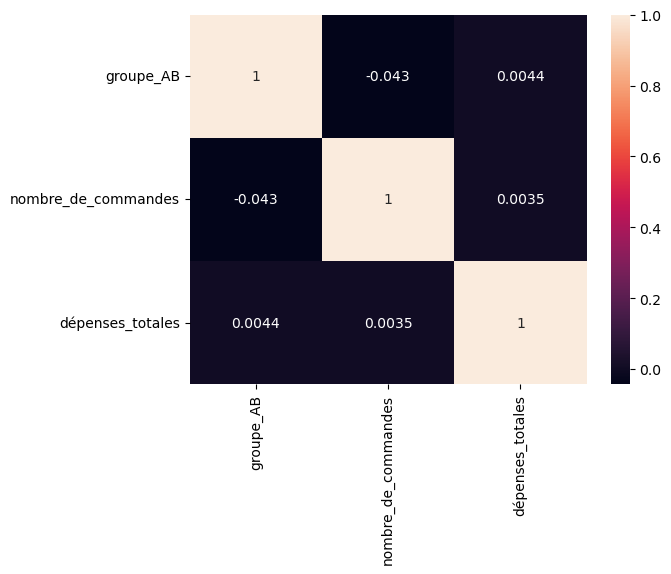

In [396]:
sns.heatmap(correlation, annot = True) #pas de correlation entre les variables 

In [ ]:
#methode 2 transposer les tableau pour avpoir AB en abscisse 
 #df_all_clean_T = df_all_clean.pivot(index='AB_group', columns=['payment_value'], values='bmi').reset_index()

### 4 - A l'aide d'une simple opération, comparez les dépenses moyennes dans chaque groupe

In [ ]:
#deja fait

### 5 - A l'aide d'un test statistique, déterminez si votre comparaison est significative.
Pour ce faire, choisissez un niveau de confiance de 95% dans un premier temps.

In [397]:
aggregated_df

,customer_unique_id,ville,état,groupe_AB,nombre_de_commandes,dépenses_totales
0,0019da6aa6bcb27cc32f1249bd12da05,limeira,SP,0,1,87.71
1,004256f082951ec189a4962b6788c214,sao paulo,SP,0,1,259.15
2,0055bbb9c95f6acb8db89d1f6c316407,criciuma,SC,1,1,83.23
3,00605a8897ed9ad73b5c93bebad2541a,campos dos goytacazes,RJ,0,1,31.13
4,0062adafa3846d9f372d8f1bde591b24,sao paulo,SP,0,1,149.87
...,...,...,...,...,...,...
1611,ff27e114922de117301ebe32dcec9ade,artur nogueira,SP,1,1,35.93
1612,ff3e14860e32acc535aea6a5402d531c,belem,PA,0,1,98.79
1613,ff57f8187098025972fce7e36704ab98,sao paulo,SP,1,1,37.77
1614,ff7e7d4a4669fc03606a21eedad169e3,sao paulo,SP,0,1,30.38


In [398]:
groupe_A = aggregated_df[aggregated_df['groupe_AB']== 0 ]
groupe_A


,customer_unique_id,ville,état,groupe_AB,nombre_de_commandes,dépenses_totales
0,0019da6aa6bcb27cc32f1249bd12da05,limeira,SP,0,1,87.71
1,004256f082951ec189a4962b6788c214,sao paulo,SP,0,1,259.15
3,00605a8897ed9ad73b5c93bebad2541a,campos dos goytacazes,RJ,0,1,31.13
4,0062adafa3846d9f372d8f1bde591b24,sao paulo,SP,0,1,149.87
6,0085d749fc64f766ece1729464f8039a,jaboatao dos guararapes,PE,0,1,349.53
...,...,...,...,...,...,...
1607,fee6e134e5709ca3b2496610ad7c4172,sao gotardo,MG,0,1,225.21
1609,ff11d3fea0c002ef421b75fbfb7b81b6,belo horizonte,MG,0,1,116.94
1610,ff1595b176859956405b859adb938cb0,sao carlos,SP,0,1,153.20
1612,ff3e14860e32acc535aea6a5402d531c,belem,PA,0,1,98.79


In [399]:
groupe_B = aggregated_df[aggregated_df['groupe_AB']== 1 ]
groupe_B 

,customer_unique_id,ville,état,groupe_AB,nombre_de_commandes,dépenses_totales
2,0055bbb9c95f6acb8db89d1f6c316407,criciuma,SC,1,1,83.23
5,007a2fab7046647dad04fe7d08c57820,rio de janeiro,RJ,1,1,126.48
9,0113282a7fe79b3d8489193ccc601efb,sao paulo,SP,1,1,125.69
10,011784926e81122b1abd0210b5888c22,sao jose dos campos,SP,1,1,346.45
11,012755131a5b785b0ae3291c339a9051,sao paulo,SP,1,1,378.20
...,...,...,...,...,...,...
1605,fe222e7dcf318adbf741789c7dca025a,belo horizonte,MG,1,1,134.59
1608,fefb7a3dc79dd2dd6ebfdc992149ad6d,rio de janeiro,RJ,1,1,61.32
1611,ff27e114922de117301ebe32dcec9ade,artur nogueira,SP,1,1,35.93
1613,ff57f8187098025972fce7e36704ab98,sao paulo,SP,1,1,37.77


In [400]:
import scipy.stats as st
from scipy import stats

In [401]:
test= stats.ttest_ind(groupe_A['dépenses_totales'],groupe_B['dépenses_totales'])
test #pas de diff sign entre les deux moyennes 

TtestResult(statistic=-0.17843088434041016, pvalue=0.8584069891503966, df=1614.0)

<Axes: xlabel='dépenses_totales', ylabel='Count'>

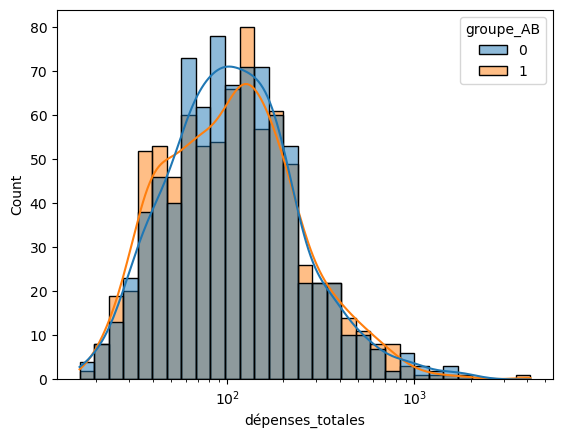

In [402]:
#faire histogramme de la dist des 2 groupe A et B 
sns.histplot(data =aggregated_df , x =aggregated_df['dépenses_totales'], hue= 'groupe_AB',  kde = True, log_scale=True) #, hue=groupe_B['dépenses_totales'])
#plt.hist([groupe_A['dépenses_totales'],groupe_B['dépenses_totales']], label = ['Groupe A', 'Groupe B'])
#sns.histplot([groupe_A['dépenses_totales'],groupe_B['dépenses_totales']], kde = True) #, hue=groupe_B['dépenses_totales'])


<Axes: xlabel='dépenses_totales', ylabel='Count'>

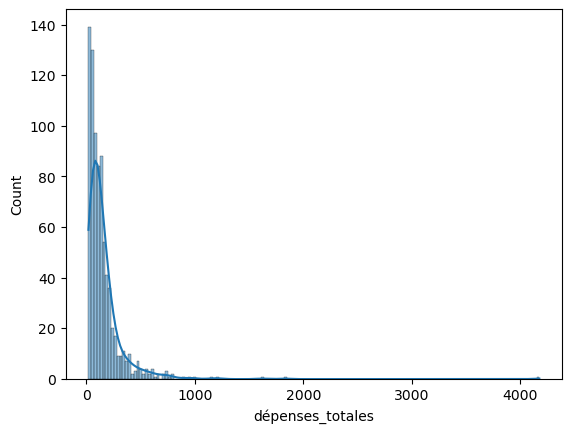

In [403]:
sns.histplot(groupe_B['dépenses_totales'], kde = True)

In [404]:
groupe_B['dépenses_totales'].describe()

count     799.000000
mean      157.750325
std       219.996276
min        18.360000
25%        56.990000
50%       106.870000
75%       179.050000
max      4175.260000
Name: dépenses_totales, dtype: float64